In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
olympics_raw = pd.read_csv("C:/Users/Lenovo/Desktop/Enano/Ironhack/First_Project/Olympics_2020/Athletes_summer_games.csv")

In [5]:
olympics_raw.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [7]:
df = olympics_raw.copy()

In [9]:
df.head()

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237673 entries, 0 to 237672
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  237673 non-null  int64  
 1   Name        237673 non-null  object 
 2   Sex         237673 non-null  object 
 3   Age         228484 non-null  float64
 4   Team        237673 non-null  object 
 5   NOC         237673 non-null  object 
 6   Games       237673 non-null  object 
 7   Year        237673 non-null  int64  
 8   Season      237673 non-null  object 
 9   City        237673 non-null  object 
 10  Sport       237673 non-null  object 
 11  Event       237673 non-null  object 
 12  Medal       36537 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 23.6+ MB


In [11]:
# Remove NaNs from "Medal" to keep only the athletes that won a medal
df_medals = df.dropna(subset=['Medal'])

In [33]:
df_medals

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,37,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,38,Arvo Ossian Aaltonen,M,30.0,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,41,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,42,Paavo Johannes Aaltonen,M,28.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237654,15102,ZOU Jingyuan,M,23.0,China,CHN,2020 Summer,2020,Summer,Tokyo,Artistic Gymnastics,Men's Team,Bronze
237657,15105,ZUBIMENDI Martin,M,22.0,Spain,ESP,2020 Summer,2020,Summer,Tokyo,Football,Men Team,Silver
237658,15106,ZUEV Alexander,M,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,3x3 Basketball,Men Team,Silver
237664,15112,ZVEREV Alexander,M,24.0,Germany,GER,2020 Summer,2020,Summer,Tokyo,Tennis,Men's Singles,Gold


In [12]:
# New subset with only the needed columns
df_medal_count = df_medals[['NOC', 'Year', 'Sport', 'Event', 'Medal']]

# Remove duplicates based on the selected columns
df_medal_count = df_medal_count.drop_duplicates()

In [13]:
df_medal_count

,NOC,Year,Sport,Event,Medal
3,DEN,1900,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
12,FIN,1920,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
13,FIN,1920,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
15,FIN,1948,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
16,FIN,1948,Gymnastics,Gymnastics Men's Team All-Around,Gold
...,...,...,...,...,...
237618,KGZ,2020,Wrestling,Women's Freestyle 68kg,Bronze
237643,USA,2020,Taekwondo,Women -57kg,Gold
237652,CHN,2020,Artistic Gymnastics,Men's Parallel Bars,Gold
237664,GER,2020,Tennis,Men's Singles,Gold


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\2183007215.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')


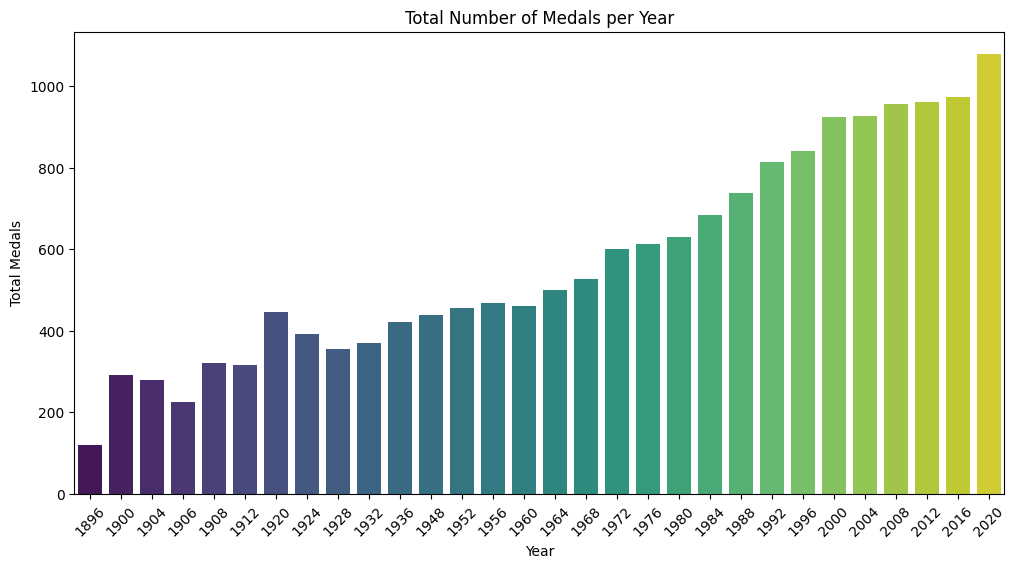

In [14]:
# Group the data by "Year" and count the number of medals for each year
medal_counts_by_year = df_medal_count.groupby('Year').size().reset_index(name='MedalCount')

plt.figure(figsize=(12, 6))
sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')

plt.title('Total Number of Medals per Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\2445116444.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')


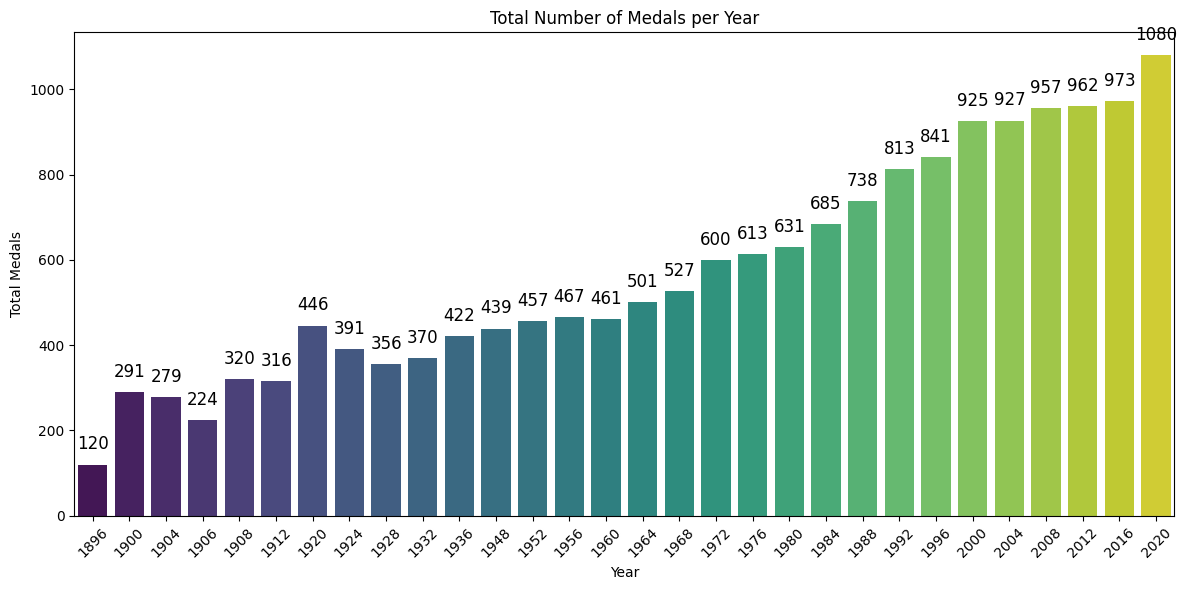

In [27]:
# Group the data by "Year" and count the number of medals for each year
medal_counts_by_year = df_medal_count.groupby('Year').size().reset_index(name='MedalCount')

plt.figure(figsize=(12, 6))
bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')

# Add labels to each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')

# Customize the chart
plt.title('Total Number of Medals per Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the chart
plt.tight_layout()
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\733064692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')


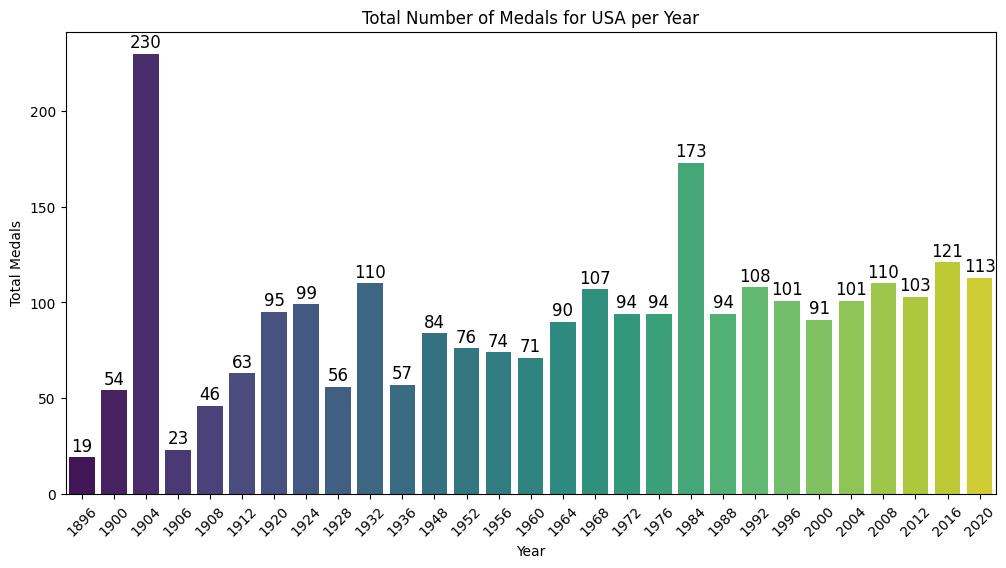

In [105]:
specific_noc = 'USA'

df_specific_noc = df_medal_count[df_medal_count['NOC'] == specific_noc]

medal_counts_by_year = df_specific_noc.groupby('Year').size().reset_index(name='MedalCount')

plt.figure(figsize=(12, 6))
bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')

for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'),
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='center',
                  size=12, xytext=(0, 8),
                  textcoords='offset points')

plt.title(f'Total Number of Medals for {specific_noc} per Year')
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)

plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\4288283762.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=gold_medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')


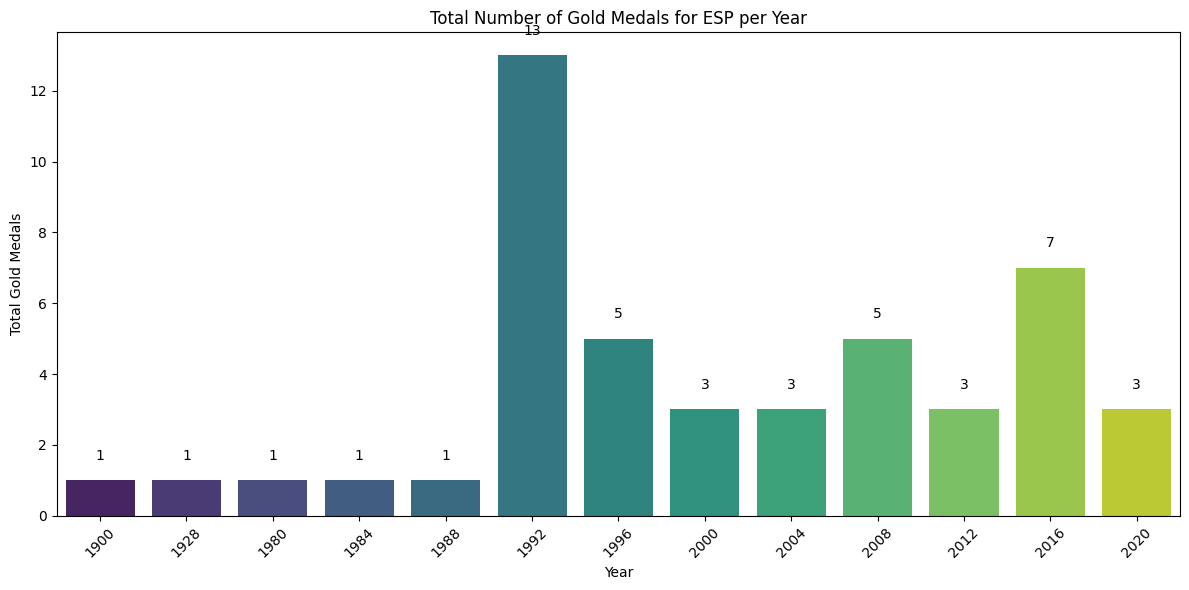

In [30]:
specific_noc = 'ESP'

df_specific_noc_gold = df_medal_count[(df_medal_count['NOC'] == specific_noc) & (df_medal_count['Medal'] == 'Gold')]

gold_medal_counts_by_year = df_specific_noc_gold.groupby('Year').size().reset_index(name='MedalCount')

plt.figure(figsize=(12, 6))
bars = sns.barplot(data=gold_medal_counts_by_year, x='Year', y='MedalCount', palette='viridis')

for bar, count in zip(bars.patches, gold_medal_counts_by_year['MedalCount']):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
              f'{count}',
              ha='center', va='bottom', fontsize=10)

plt.title(f'Total Number of Gold Medals for {specific_noc} per Year')
plt.xlabel('Year')
plt.ylabel('Total Gold Medals')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [17]:
df

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,24.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,1,A Lamusi,M,23.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237668,15116,ZWOLINSKA Klaudia,F,22.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Canoe Slalom,Women's Kayak,NaN
237669,15117,ZYKOVA Yulia,F,25.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Shooting,50m Rifle 3 Positions Women,Silver
237670,15118,ZYUZINA Ekaterina,F,24.0,Russia,ROC,2020 Summer,2020,Summer,Tokyo,Sailing,Women's One Person Dinghy - Laser Radial,NaN
237671,15119,ZYZANSKA Sylwia,F,24.0,Poland,POL,2020 Summer,2020,Summer,Tokyo,Archery,Women's Individual,NaN


In [18]:
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_filter = df[relevant_columns]

# Find the maximum and minimum ages for each year
max_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmax()]
min_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmin()]

# Concatenate the results to have both max and min in one DataFrame
max_ages['AgeType'] = 'Max'
min_ages['AgeType'] = 'Min'
result = pd.concat([max_ages, min_ages])

# Sort the result by Year and AgeType for clarity
result_sorted = result.sort_values(by=['Year', 'AgeType'])

# Display the result
print(result_sorted[['Name', 'Sex', 'NOC', 'Event', 'Year', 'Age', 'AgeType']])

                                                     Name Sex  NOC  \
210016                       Charles Waldstein (-Walston)   M  USA   
117228                                 Dimitrios Loundras   M  GRE   
123763                             Charles William Martin   M  FRA   
66305   Catherine Marie Blanche "Katie" Gillou (-Fenwick)   F  FRA   
176830                                Thomas Foster Scott   M  USA   
150579                            George William Passmore   M  USA   
134286                                 Lon Ernest Moreaux   M  FRA   
149460                           Vahram Hepet S. Papazyan   M  TUR   
76986                             Robert Walker Heathcote   M  GBR   
197891                                 dn (-Edmund) Toldi   M  HUN   
163153                                      Jacob W. Rees   M  GBR   
29738                   Greta Ingeborg Carlsson (-Nygren)   F  SWE   
191463                                  Oscar Gomer Swahn   M  SWE   
165110              

In [19]:
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_filter = df_medals[relevant_columns]

# Find the maximum and minimum ages for each year
max_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmax()]
min_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmin()]

# Concatenate the results to have both max and min in one DataFrame
max_ages['AgeType'] = 'Max'
min_ages['AgeType'] = 'Min'
result = pd.concat([max_ages, min_ages])

# Sort the result by Year and AgeType for clarity
result_sorted = result.sort_values(by=['Year', 'AgeType'])

# Display the result
print(result_sorted[['Name', 'Sex', 'NOC', 'Event', 'Year', 'Age', 'AgeType']])

                                                     Name Sex  NOC  \
67265                                        Anton Gdrich   M  GER   
117228                                 Dimitrios Loundras   M  GRE   
123765                             Charles William Martin   M  FRA   
628                           Louis Grenville "Lou" Abell   M  USA   
50740                               Samuel Harding Duvall   M  USA   
150579                            George William Passmore   M  USA   
134286                                 Lon Ernest Moreaux   M  FRA   
31664                                      Giorgio Cesana   M  ITA   
130993                             Joshua Kearney Millner   M  GBR   
14361        Francis Joseph Edmund "Frank" De Beaurepaire   M  ANZ   
191460                                  Oscar Gomer Swahn   M  SWE   
147496                              Louise Otto (-Sander)   F  GER   
191465                                  Oscar Gomer Swahn   M  SWE   
165110              

In [20]:
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_filter = df_medals[relevant_columns]

# Find the maximum and minimum ages for each year
max_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmax()]
min_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmin()]

# Concatenate the results to have both max and min in one DataFrame
max_ages['AgeType'] = 'Max'
min_ages['AgeType'] = 'Min'
result = pd.concat([max_ages, min_ages])

# Sort the result by Year and AgeType for clarity
result_sorted = result.sort_values(by=['Year', 'AgeType'])

df_by_age = result_sorted[['Name', 'Sex', 'NOC', 'Event', 'Year', 'Age', 'Medal', 'AgeType']]

In [21]:
df_by_age

,Name,Sex,NOC,Event,Year,Age,Medal,AgeType
67265,Anton Gdrich,M,GER,"Cycling Men's Road Race, Individual",1896,36.0,Silver,Max
117228,Dimitrios Loundras,M,GRE,"Gymnastics Men's Parallel Bars, Teams",1896,10.0,Bronze,Min
123765,Charles William Martin,M,FRA,Sailing Mixed 0.5-1 Ton,1900,71.0,Silver,Max
628,"Louis Grenville ""Lou"" Abell",M,USA,Rowing Men's Coxed Eights,1900,15.0,Gold,Min
50740,Samuel Harding Duvall,M,USA,Archery Men's Team Round,1904,68.0,Silver,Max
150579,George William Passmore,M,USA,Lacrosse Men's Lacrosse,1904,14.0,Silver,Min
134286,Lon Ernest Moreaux,M,FRA,"Shooting Men's Free Pistol, 25 metres",1906,54.0,Silver,Max
31664,Giorgio Cesana,M,ITA,Rowing Men's Coxed Pairs (1 kilometres),1906,14.0,Gold,Min
130993,Joshua Kearney Millner,M,GBR,"Shooting Men's Free Rifle, 1,000 Yards",1908,60.0,Gold,Max
14361,"Francis Joseph Edmund ""Frank"" De Beaurepaire",M,ANZ,Swimming Men's 400 metres Freestyle,1908,16.0,Silver,Min


In [96]:
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_filter = df_medals[relevant_columns]

# Find the maximum ages for each year
max_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmax()]

# Add a column to indicate that these are max ages
max_ages['AgeType'] = 'Max'

In [97]:
max_ages

,Name,Sex,Age,NOC,Year,Event,Medal,AgeType
67265,Anton Gdrich,M,36.0,GER,1896,"Cycling Men's Road Race, Individual",Silver,Max
123765,Charles William Martin,M,71.0,FRA,1900,Sailing Mixed 0.5-1 Ton,Silver,Max
50740,Samuel Harding Duvall,M,68.0,USA,1904,Archery Men's Team Round,Silver,Max
134286,Lon Ernest Moreaux,M,54.0,FRA,1906,"Shooting Men's Free Pistol, 25 metres",Silver,Max
130993,Joshua Kearney Millner,M,60.0,GBR,1908,"Shooting Men's Free Rifle, 1,000 Yards",Gold,Max
191460,Oscar Gomer Swahn,M,64.0,SWE,1912,"Shooting Men's Running Target, Single Shot, Team",Gold,Max
191465,Oscar Gomer Swahn,M,72.0,SWE,1920,"Shooting Men's Running Target, Double Shot, Team",Silver,Max
114556,Ernst Linder,M,56.0,SWE,1924,"Equestrianism Men's Dressage, Individual",Gold,Max
85970,Isaac Lazarus Israls,M,63.0,NED,1928,"Art Competitions Mixed Painting, Paintings",Gold,Max
119557,Frederick William MacMonnies,M,68.0,USA,1932,"Art Competitions Mixed Sculpturing, Medals And...",Silver,Max


In [99]:
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_filter = df_medals[relevant_columns]

# Find the minimum ages for each year
min_ages = df_age_filter.loc[df_age_filter.groupby('Year')['Age'].idxmin()]

# Add a column to indicate that these are min ages
min_ages['AgeType'] = 'Min'

In [100]:
min_ages

,Name,Sex,Age,NOC,Year,Event,Medal,AgeType
117228,Dimitrios Loundras,M,10.0,GRE,1896,"Gymnastics Men's Parallel Bars, Teams",Bronze,Min
628,"Louis Grenville ""Lou"" Abell",M,15.0,USA,1900,Rowing Men's Coxed Eights,Gold,Min
150579,George William Passmore,M,14.0,USA,1904,Lacrosse Men's Lacrosse,Silver,Min
31664,Giorgio Cesana,M,14.0,ITA,1906,Rowing Men's Coxed Pairs (1 kilometres),Gold,Min
14361,"Francis Joseph Edmund ""Frank"" De Beaurepaire",M,16.0,ANZ,1908,Swimming Men's 400 metres Freestyle,Silver,Min
147496,Louise Otto (-Sander),F,15.0,GER,1912,Swimming Women's 4 x 100 metres Freestyle Relay,Silver,Min
165110,Aileen Muriel Riggin (-Soule),F,13.0,USA,1920,Diving Women's Springboard,Gold,Min
112250,Marcel Pierre Lepan,M,14.0,FRA,1924,Rowing Men's Coxed Fours,Silver,Min
65895,Luigina Giavotti,F,11.0,ITA,1928,Gymnastics Women's Team All-Around,Silver,Min
45133,"Willemijntje ""Willy"" den Ouden (-Broms, -Jager...",F,14.0,NED,1932,Swimming Women's 100 metres Freestyle,Silver,Min


In [23]:
df_gold_medals = df_medals[df_medals['Medal'] == 'Gold']

# Step 2: Select the relevant columns
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_gold_filter = df_gold_medals[relevant_columns]

# Step 3: Find the maximum and minimum ages for each year
max_ages = df_age_gold_filter.loc[df_age_gold_filter.groupby('Year')['Age'].idxmax()]
min_ages = df_age_gold_filter.loc[df_age_gold_filter.groupby('Year')['Age'].idxmin()]

# Step 4: Concatenate the results to have both max and min in one DataFrame
max_ages['AgeType'] = 'Max'
min_ages['AgeType'] = 'Min'
df_gold_by_age = result = pd.concat([max_ages, min_ages])

In [92]:
df_gold_medals = df_medals[df_medals['Medal'] == 'Gold']

# Select the relevant columns
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_gold_filter = df_gold_medals[relevant_columns]

# Find the maximum ages for each year
max_ages = df_age_gold_filter.loc[df_age_gold_filter.groupby('Year')['Age'].idxmax()]

# Add a column to indicate that these are max ages
max_ages['AgeType'] = 'Max'



In [93]:
max_ages

,Name,Sex,Age,NOC,Year,Event,Medal,AgeType
140095,Karl Neukirch,M,31.0,GER,1896,"Gymnastics Men's Parallel Bars, Teams",Gold,Max
211576,Chrtien Andr Waydelich,M,58.0,FRA,1900,"Croquet Mixed Singles, Two Balls",Gold,Max
86948,Charles Jacobus,M,64.0,USA,1904,Roque Men's Singles,Gold,Max
134290,Lon Ernest Moreaux,M,54.0,FRA,1906,Shooting Men's Dueling Pistol Au Vise 20 metres,Gold,Max
130993,Joshua Kearney Millner,M,60.0,GBR,1908,"Shooting Men's Free Rifle, 1,000 Yards",Gold,Max
191460,Oscar Gomer Swahn,M,64.0,SWE,1912,"Shooting Men's Running Target, Single Shot, Team",Gold,Max
204545,Gerard Theodor Hubert Van Innis,M,54.0,BEL,1920,"Archery Men's Target Archery, 28 metres, Indiv...",Gold,Max
114556,Ernst Linder,M,56.0,SWE,1924,"Equestrianism Men's Dressage, Individual",Gold,Max
85970,Isaac Lazarus Israls,M,63.0,NED,1928,"Art Competitions Mixed Painting, Paintings",Gold,Max
210262,David August Wallin,M,56.0,SWE,1932,"Art Competitions Mixed Painting, Paintings",Gold,Max


In [94]:
df_gold_medals = df_medals[df_medals['Medal'] == 'Gold']

# Select the relevant columns
relevant_columns = ['Name', 'Sex', 'Age', 'NOC', 'Year', 'Event', 'Medal']
df_age_gold_filter = df_gold_medals[relevant_columns]

# Find the minimum ages for each year
min_ages = df_age_gold_filter.loc[df_age_gold_filter.groupby('Year')['Age'].idxmin()]

# Add a column to indicate that these are min ages
min_ages['AgeType'] = 'Min'

In [95]:
min_ages

,Name,Sex,Age,NOC,Year,Event,Medal,AgeType
58549,Marie Lon Flameng,M,18.0,FRA,1896,Cycling Men's 100 kilometres,Gold,Min
628,"Louis Grenville ""Lou"" Abell",M,15.0,USA,1900,Rowing Men's Coxed Eights,Gold,Min
39640,"Edward McClellan ""Ned"" Cummins",M,17.0,USA,1904,Golf Men's Team,Gold,Min
31664,Giorgio Cesana,M,14.0,ITA,1906,Rowing Men's Coxed Pairs (1 kilometres),Gold,Min
59748,"William ""Willie"" Foster",M,17.0,GBR,1908,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,Min
90084,"Anna Teresa Margareta ""Greta"" Johansson (-Bran...",F,17.0,SWE,1912,Diving Women's Plain High,Gold,Min
165110,Aileen Muriel Riggin (-Soule),F,13.0,USA,1920,Diving Women's Springboard,Gold,Min
142465,"Martha (Mrta) Maria Norelius (-McAllister, -Wr...",F,15.0,USA,1924,Swimming Women's 400 metres Freestyle,Gold,Min
22737,Hans Bourquin,M,13.0,SUI,1928,Rowing Men's Coxed Pairs,Gold,Min
99216,Kuzuo Kitamura,M,14.0,JPN,1932,"Swimming Men's 1,500 metres Freestyle",Gold,Min


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\3064663838.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette=color_palette)


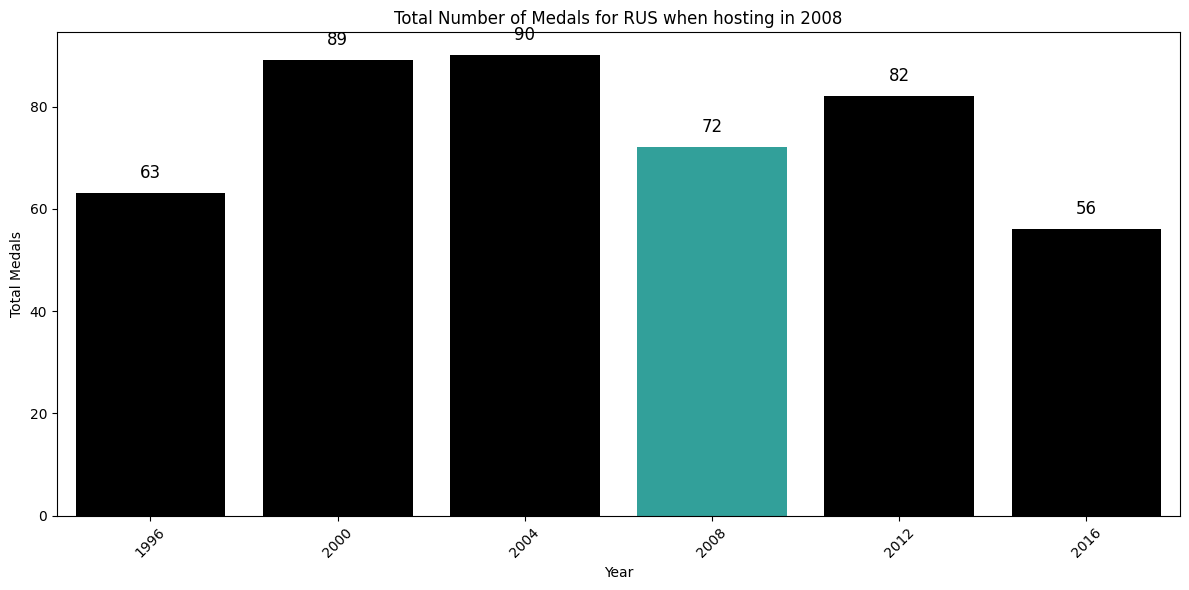

In [74]:
def plot_medal_counts_for_year(df, specific_noc, selected_year):
    # Step 1: Remove rows with NaN values in the "Medals" column
    df_cleaned = df.dropna(subset=["Medal"])
    
    # Step 2: Remove duplicates based on "Medal", "Year", "NOC", and "Event"
    new_df = df_cleaned.drop_duplicates(subset=["Medal", "Year", "NOC", "Event"])
    
    # Step 3: Filter the data for the specified NOC
    df_specific_noc = new_df[new_df['NOC'] == specific_noc]
    
    if df_specific_noc.empty:
        print(f"No data available for NOC: {specific_noc}")
        return

    # Step 4: Count the number of medals by year for the specified NOC
    medal_counts_by_year = df_specific_noc.groupby('Year').size().reset_index(name='MedalCount')
    
    # Get a sorted list of unique years from the data
    unique_years = sorted(medal_counts_by_year['Year'].unique())
    
    if selected_year not in unique_years:
        print(f"Selected year {selected_year} not found in the data.")
        return
    
    selected_index = unique_years.index(selected_year)
    
    # Step 5: Define the range of years to include
    start_index = max(selected_index - 3, 0)
    end_index = min(selected_index + 4, len(unique_years))
    
    # Get the years to include
    years_to_include = unique_years[start_index:end_index]
    
    # Step 6: Filter the data for the selected years
    df_filtered_years = df_specific_noc[df_specific_noc['Year'].isin(years_to_include)]
    
    # Step 7: Group the data by Year and count the number of medals
    medal_counts_by_year = df_filtered_years.groupby('Year').size().reset_index(name='MedalCount')
    
    # Step 8: Create the bar chart
    plt.figure(figsize=(12, 6))
    color_palette = ['black' if year != selected_year else 'lightseagreen' for year in years_to_include]
    bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette=color_palette)

    # Add labels to each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='bottom',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')

    # Customize the chart
    plt.title(f'Total Number of Medals for {specific_noc} when hosting in {selected_year}')
    plt.xlabel('Year')
    plt.ylabel('Total Medals')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Display the chart
    plt.tight_layout()
    plt.show()

# Example usage
specific_noc = 'RUS'  # Change as needed
selected_year = 2008  # Change as needed

# Assuming df is your DataFrame
plot_medal_counts_for_year(df, specific_noc, selected_year)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\2739700343.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette=color_palette)


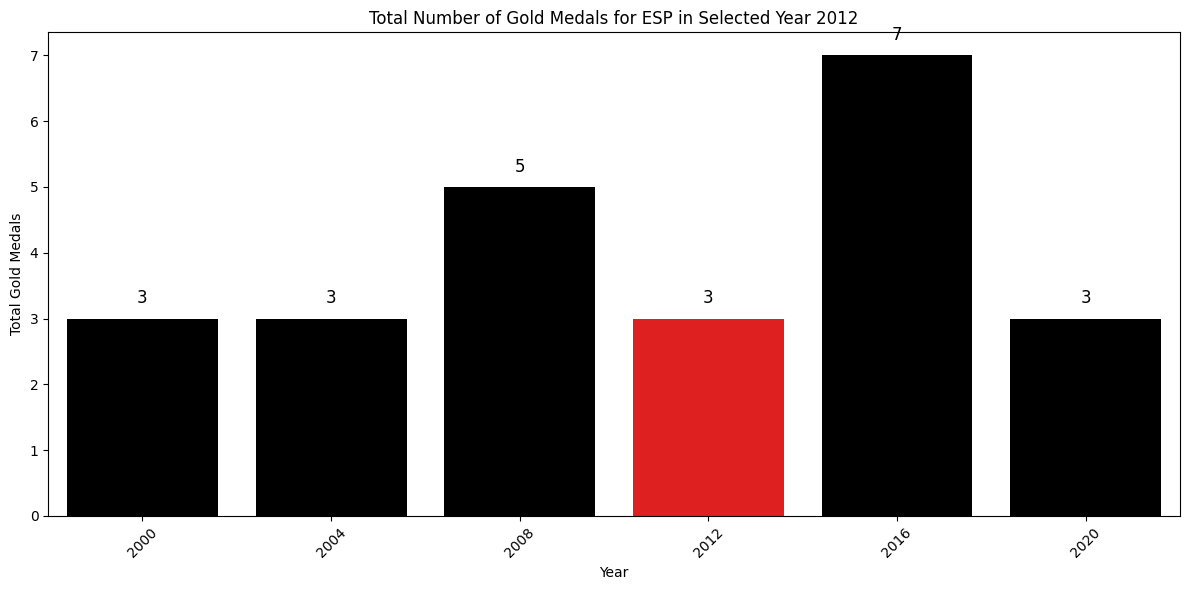

In [87]:
def plot_medal_counts_for_year(df, specific_noc, selected_year):
    # Step 1: Remove rows with NaN values in the "Medal" column
    df_cleaned = df.dropna(subset=["Medal"])
    
    # Step 2: Remove duplicates based on "Medal", "Year", "NOC", and "Event"
    new_df = df_cleaned.drop_duplicates(subset=["Medal", "Year", "NOC", "Event"])
    
    # Step 3: Filter the data for the specified NOC
    df_specific_noc = new_df[new_df['NOC'] == specific_noc]
    
    if df_specific_noc.empty:
        print(f"No data available for NOC: {specific_noc}")
        return

    # Step 4: Filter the data to include only rows where "Medal" is "Gold"
    df_specific_noc_gold = df_specific_noc[df_specific_noc['Medal'] == 'Gold']
    
    # Step 5: Count the number of gold medals by year for the specified NOC
    medal_counts_by_year = df_specific_noc_gold.groupby('Year').size().reset_index(name='MedalCount')
    
    # Get a sorted list of unique years from the data
    unique_years = sorted(medal_counts_by_year['Year'].unique())
    
    if selected_year not in unique_years:
        print(f"Selected year {selected_year} not found in the data.")
        return
    
    selected_index = unique_years.index(selected_year)
    
    # Step 6: Define the range of years to include
    start_index = max(selected_index - 3, 0)
    end_index = min(selected_index + 4, len(unique_years))
    
    # Get the years to include
    years_to_include = unique_years[start_index:end_index]
    
    # Step 7: Filter the data for the selected years
    df_filtered_years = df_specific_noc_gold[df_specific_noc_gold['Year'].isin(years_to_include)]
    
    # Step 8: Group the data by Year and count the number of gold medals
    medal_counts_by_year = df_filtered_years.groupby('Year').size().reset_index(name='MedalCount')
    
    # Step 9: Create the bar chart
    plt.figure(figsize=(12, 6))
    color_palette = ['black' if year != selected_year else 'red' for year in years_to_include]
    bars = sns.barplot(data=medal_counts_by_year, x='Year', y='MedalCount', palette=color_palette)

    # Add labels to each bar
    for bar in bars.patches:
        bars.annotate(format(bar.get_height(), '.0f'),
                      (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                      ha='center', va='bottom',
                      size=12, xytext=(0, 8),
                      textcoords='offset points')

    # Customize the chart
    plt.title(f'Total Number of Gold Medals for {specific_noc} in Selected Year {selected_year}')
    plt.xlabel('Year')
    plt.ylabel('Total Gold Medals')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Display the chart
    plt.tight_layout()
    plt.show()

# Example usage
specific_noc = 'ESP'  # Change as needed
selected_year = 2012  # Change as needed

# Assuming df is your DataFrame
plot_medal_counts_for_year(df, specific_noc, selected_year)

In [76]:
df["NOC"].unique()

array(['CHN', 'DEN', 'NED', 'FIN', 'NOR', 'ROU', 'EST', 'FRA', 'MAR',
       'ESP', 'EGY', 'IRI', 'BUL', 'ITA', 'CHA', 'AZE', 'SUD', 'RUS',
       'ARG', 'CUB', 'BLR', 'GRE', 'CMR', 'TUR', 'CHI', 'MEX', 'USA',
       'URS', 'NCA', 'HUN', 'NGR', 'ALG', 'KUW', 'BRN', 'PAK', 'IRQ',
       'UAR', 'LIB', 'QAT', 'MAS', 'GER', 'CAN', 'IRL', 'AUS', 'RSA',
       'ERI', 'TAN', 'JOR', 'TUN', 'LBA', 'BEL', 'DJI', 'PLE', 'COM',
       'KAZ', 'BRU', 'IND', 'KSA', 'SYR', 'MDV', 'ETH', 'UAE', 'YAR',
       'INA', 'PHI', 'SGP', 'UZB', 'KGZ', 'TJK', 'EUN', 'JPN', 'CGO',
       'SUI', 'BRA', 'GDR', 'MON', 'ISR', 'URU', 'SWE', 'SRI', 'ARM',
       'CIV', 'KEN', 'BEN', 'GBR', 'GHA', 'SOM', 'NIG', 'MLI', 'AFG',
       'POL', 'CRC', 'PAN', 'GEO', 'SLO', 'GUY', 'NZL', 'POR', 'PAR',
       'ANG', 'VEN', 'COL', 'FRG', 'BAN', 'PER', 'ESA', 'PUR', 'UGA',
       'HON', 'ECU', 'TKM', 'MRI', 'SEY', 'TCH', 'LUX', 'MTN', 'SKN',
       'TTO', 'DOM', 'VIN', 'JAM', 'LBR', 'SUR', 'NEP', 'MGL', 'AUT',
       'PLW', 'LTU',

In [82]:
df.query('NOC == "KUW"')

,Unnamed: 0,Name,Sex,Age,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
167,229,Abdul Latif Al-Sayed Abbas Youssef Hashem,M,23.0,Kuwait,KUW,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's 400 metres Hurdles,NaN
168,230,Abdul Latif Al-Sayed Abbas Youssef Hashem,M,23.0,Kuwait,KUW,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
169,231,Abdul Latif Al-Sayed Abbas Youssef Hashem,M,27.0,Kuwait,KUW,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's 400 metres Hurdles,NaN
174,236,Essa Abbas Faleh Hashem,M,20.0,Kuwait,KUW,1980 Summer,1980,Summer,Moskva,Athletics,Athletics Men's Long Jump,NaN
246,315,Younis Abdallah Rabee,M,23.0,Kuwait,KUW,1972 Summer,1972,Summer,Munich,Athletics,Athletics Men's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222930,378,ALRASHIDI Talal,M,28.0,Kuwait,KUW,2020 Summer,2020,Summer,Tokyo,Shooting,Trap Men,NaN
222937,385,ALSHAMMARI Mudhawi,F,23.0,Kuwait,KUW,2020 Summer,2020,Summer,Tokyo,Athletics,Women's 100m,NaN
222975,423,ALYOUHA Yaqoub,M,28.0,Kuwait,KUW,2020 Summer,2020,Summer,Tokyo,Athletics,Men's 110m Hurdles,NaN
225420,2868,DASHTI Lara,F,17.0,Kuwait,KUW,2020 Summer,2020,Summer,Tokyo,Swimming,Women's 50m Freestyle,NaN


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3508\3184478292.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Medal"] = df_cleaned["Medal"].astype(str)


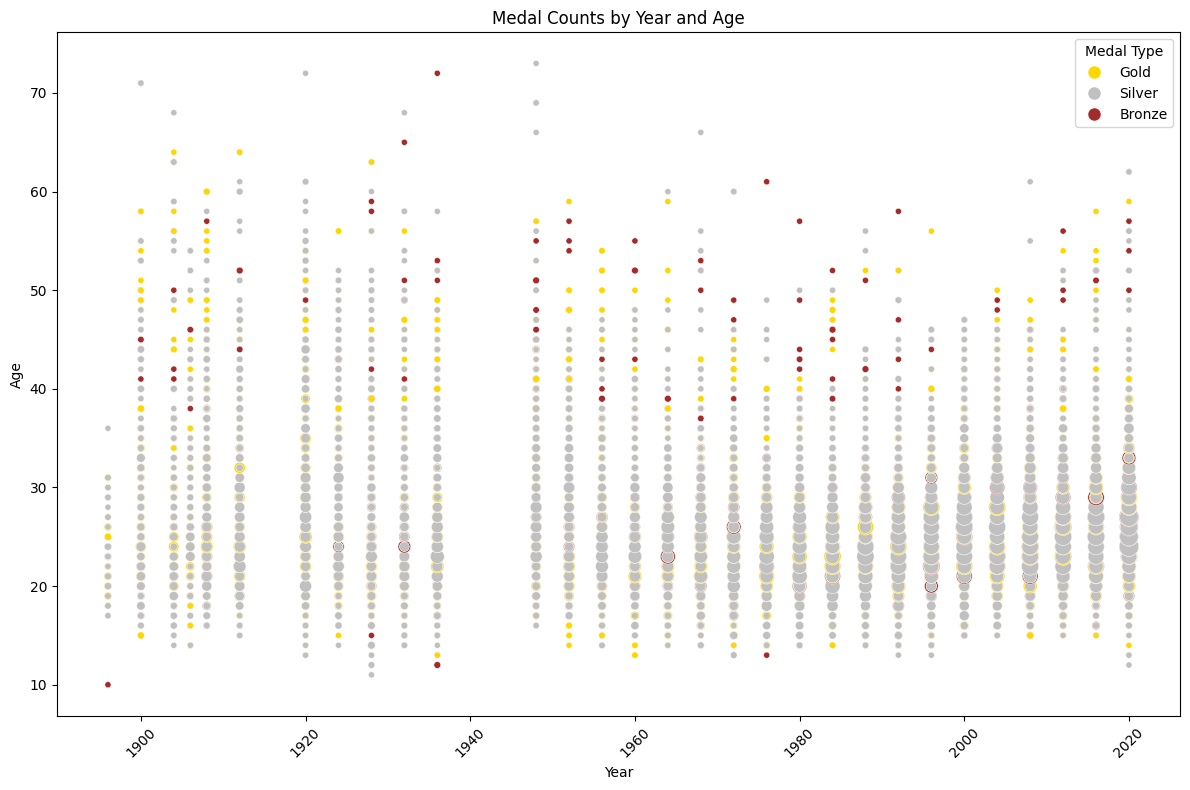

In [90]:
def plot_medal_scatter(df):
    # Step 1: Remove rows with NaN values in the "Medal" column
    df_cleaned = df.dropna(subset=["Medal"])
    
    # Step 2: Ensure "Medal" column is of string type (just in case)
    df_cleaned["Medal"] = df_cleaned["Medal"].astype(str)
    
    # Step 3: Group by "Year", "Age", and "Medal", then sum the counts
    medal_counts_by_year_age = df_cleaned.groupby(['Year', 'Age', 'Medal']).size().reset_index(name='MedalCount')
    
    # Define colors for each medal type
    color_map = {
        'Gold': 'gold',
        'Silver': 'silver',
        'Bronze': 'brown'
    }
    
    # Step 4: Create the scatter plot
    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(
        data=medal_counts_by_year_age,
        x='Year',
        y='Age',
        hue='Medal',
        palette=color_map,
        size='MedalCount',
        sizes=(20, 200),  # Adjust size scale as needed
        legend=False  # Remove the legend for the scatter plot
    )
    
    # Step 5: Customize the legend to only show color coding
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[medal], markersize=10, label=medal) 
               for medal in color_map]
    plt.legend(handles=handles, title='Medal Type')

    # Customize the chart
    plt.title('Medal Counts by Year and Age')
    plt.xlabel('Year')
    plt.ylabel('Age')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming df is your DataFrame
plot_medal_scatter(df)